In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sales_df = pd.read_csv('/Users/swarnim/Desktop/Advertising.csv')

In [7]:
sales_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
sales_df.drop('Unnamed: 0', axis= 1, inplace= True)

In [10]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
sales_df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [12]:
sales_df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


/Users/swarnim/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


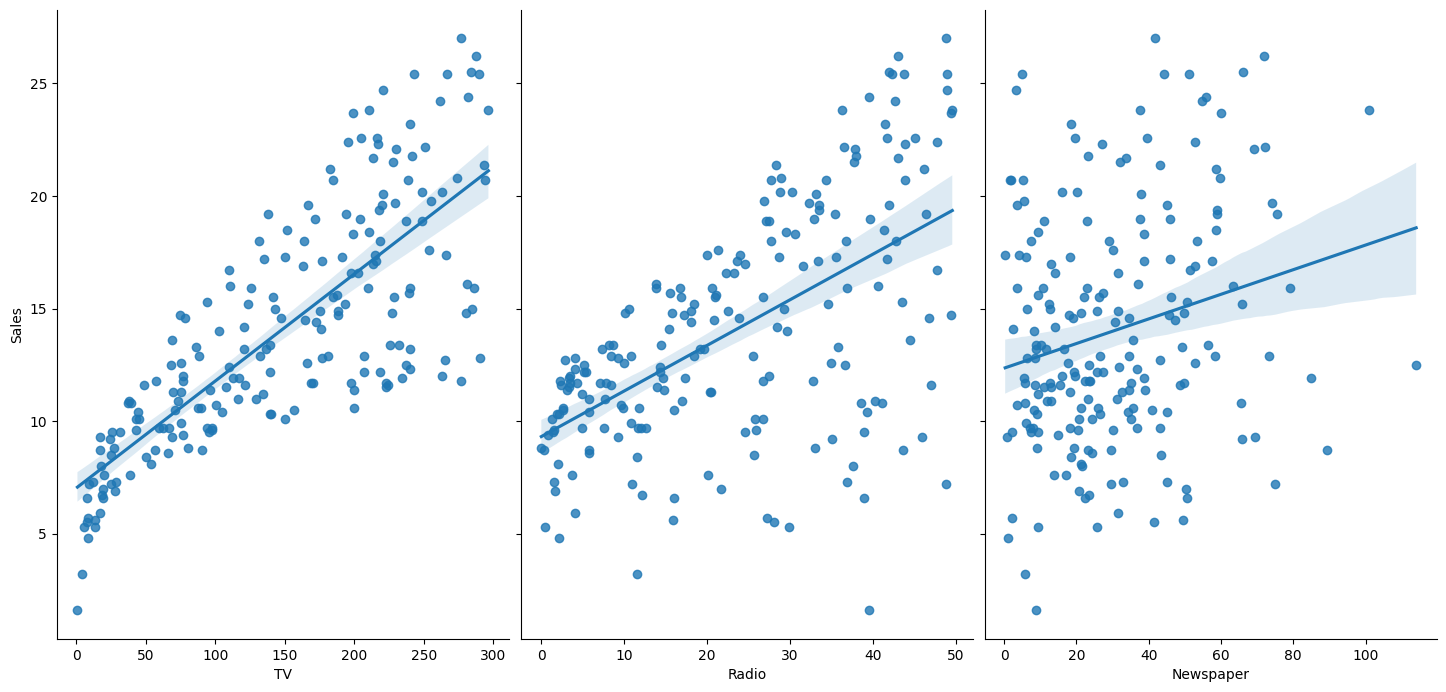

In [13]:
sns.pairplot(sales_df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [14]:
correlation_matrix = sales_df.corr()

In [15]:
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [16]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Correlation between variables')

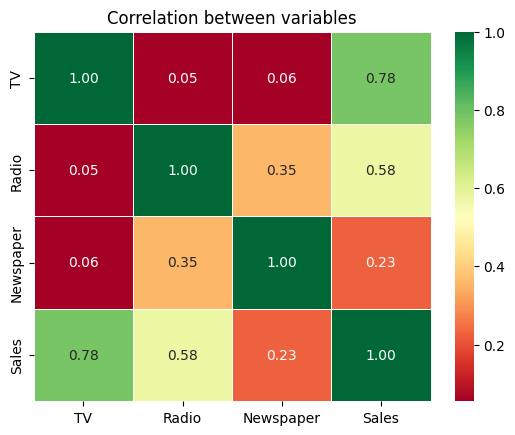

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5)
plt.title('Correlation between variables')

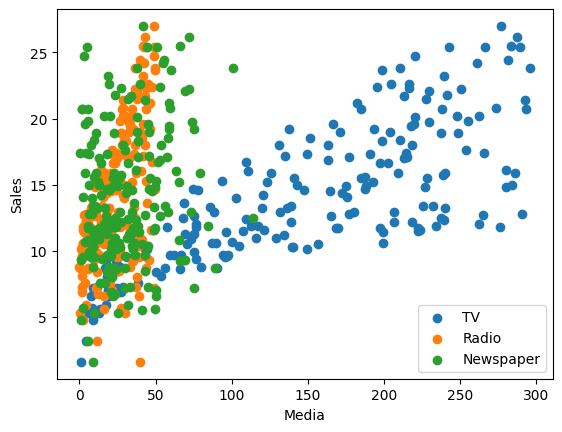

In [18]:
plt.scatter(sales_df['TV'], sales_df['Sales'], label = 'TV')
plt.scatter(sales_df['Radio'], sales_df['Sales'], label = 'Radio')
plt.scatter(sales_df['Newspaper'], sales_df['Sales'], label = 'Newspaper')
plt.xlabel('Media')
plt.ylabel('Sales')
plt.legend()

<Axes: xlabel='Radio', ylabel='Sales'>

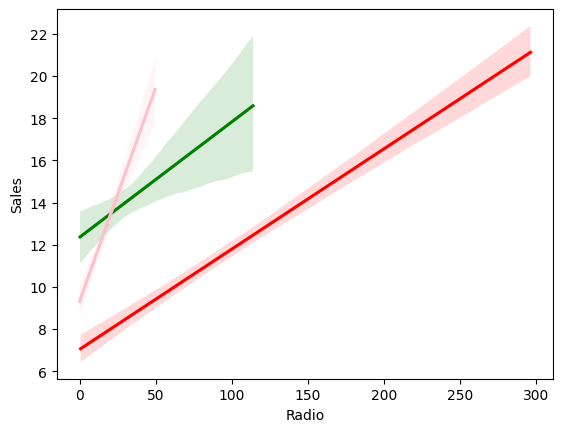

In [23]:
sns.regplot(x='TV', y='Sales', data=sales_df, scatter=False, color='red', line_kws={'color': 'red'})
sns.regplot(x='Newspaper', y='Sales', data=sales_df, scatter=False, color='green', line_kws={'color': 'green'}, label='Newspaper')
sns.regplot(x='Radio', y='Sales', data=sales_df, scatter=False, color='pink', line_kws={'color': 'pink'}, label='Radio')



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
features = sales_df[['TV', 'Radio', 'Newspaper']]

In [26]:
target = sales_df['Sales']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)

In [32]:
mse

3.1740973539761073

In [33]:
r2 = r2_score(y_test, y_pred)

In [34]:
r2

0.8994380241009119